# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset)*

In [ ]:
import pandas as pd

df = pd.read_csv("Heart_Disease_Data.csv")
df

,age,resting_BP,serum_cholestrol,max_heart_rate,old_peak,heart_disease
0,53,171,0,147,5.3,True
1,40,94,229,115,3.7,False
2,49,133,142,202,5.0,False
3,43,138,295,153,3.2,True
4,31,199,0,136,5.3,True
...,...,...,...,...,...,...
995,48,139,349,183,5.6,True
996,47,143,258,98,5.7,False
997,69,156,434,196,1.4,True
998,45,186,417,117,5.9,True


In [ ]:
df.describe()

,age,resting_BP,serum_cholestrol,max_heart_rate,old_peak
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,151.747000,311.447000,145.477000,2.707700
std,17.86473,29.965228,132.443801,34.190268,1.720753
min,20.00000,94.000000,0.000000,71.000000,0.000000
25%,34.00000,129.000000,235.750000,119.750000,1.300000
50%,49.00000,147.000000,318.000000,146.000000,2.400000
75%,64.25000,181.000000,404.250000,175.000000,4.100000
max,80.00000,200.000000,602.000000,202.000000,6.200000


# Daten aufteilen

In [ ]:
X = df.copy()
y = X.pop("heart_disease")

In [ ]:
y

0       True
1      False
2      False
3       True
4       True
       ...  
995     True
996    False
997     True
998     True
999    False
Name: heart_disease, Length: 1000, dtype: bool

In [ ]:
y.value_counts() / len(y)

True     0.58
False    0.42
Name: heart_disease, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
y_train.value_counts() / len(y_train)

True     0.58
False    0.42
Name: heart_disease, dtype: float64

In [ ]:
y_test.value_counts() / len(y_test)

True     0.58
False    0.42
Name: heart_disease, dtype: float64

# Decision Tree Classifier - Hyperparameteroptimierung (Accuracy)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

acc_model = DecisionTreeClassifier(random_state=0)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6]
}

acc_grid_search = GridSearchCV(acc_model, param_grid, cv=4, scoring='accuracy')
acc_grid_search.fit(X_train, y_train)

print("Best Accuracy: ", acc_grid_search.best_score_)
print("Best Parameter: ", acc_grid_search.best_params_)

Best Accuracy:  0.8412499999999999
Best Parameter:  {'max_depth': 3}


# Finale Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

final_acc_model = acc_grid_search.best_estimator_
y_predict_final = final_acc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict_final)
print("Final Accuracy:", accuracy)

Final Accuracy: 0.81


# Confusion Matrix

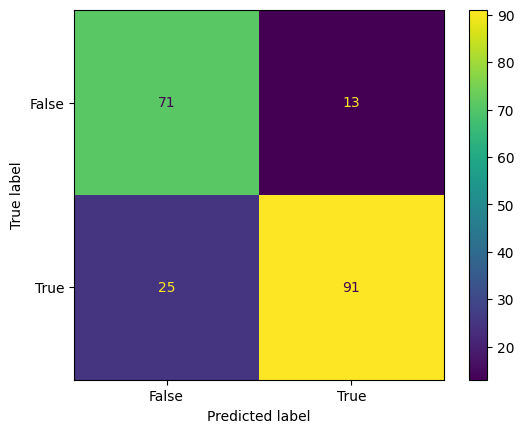

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict_final)

# Decision Tree Classifier - Hyperparameteroptimierung (F1-Score)

In [ ]:
f1_model = DecisionTreeClassifier(random_state=0)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6]
}

f1_grid_search = GridSearchCV(f1_model, param_grid, cv=4, scoring="f1")
f1_grid_search.fit(X_train, y_train)

print("Best F1-Score: ", f1_grid_search.best_score_)
print("Best Parameter: ", f1_grid_search.best_params_)

Best F1-Score:  0.8601752720586447
Best Parameter:  {'max_depth': 3}


# Precision, Recall und F1-Score auf den Testdaten:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

final_f1_model = f1_grid_search.best_estimator_
y_predict = final_f1_model.predict(X_test)

precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Precision:  0.875
Recall:  0.7844827586206896
F1-Score:  0.8272727272727273


# Wahrscheinlichkeiten ausgeben:

In [ ]:
y_proba = final_f1_model.predict_proba(X_test)[:, 1]
y_proba

array([0.2170088 , 0.2170088 , 0.2170088 , 0.91721854, 1.        ,
       0.2170088 , 0.91721854, 0.91721854, 0.2170088 , 0.91721854,
       0.2170088 , 0.2170088 , 0.2170088 , 0.91721854, 0.91721854,
       0.91721854, 0.2170088 , 0.91721854, 0.73195876, 0.91721854,
       0.2170088 , 0.2170088 , 0.73195876, 0.91721854, 0.2170088 ,
       0.2170088 , 0.91721854, 0.91721854, 0.2170088 , 0.2170088 ,
       0.91721854, 0.91721854, 0.91721854, 0.91721854, 0.2170088 ,
       0.91721854, 0.91721854, 0.73195876, 0.91721854, 0.73195876,
       0.2170088 , 0.91721854, 0.2170088 , 0.91721854, 0.73195876,
       0.2170088 , 0.2170088 , 0.91721854, 0.73195876, 0.2170088 ,
       0.2170088 , 0.2170088 , 0.2170088 , 0.2170088 , 0.2170088 ,
       0.91721854, 0.2170088 , 0.2170088 , 0.2170088 , 0.2170088 ,
       0.91721854, 0.2170088 , 0.2170088 , 0.2170088 , 0.91721854,
       0.2170088 , 0.2170088 , 0.91721854, 0.2170088 , 0.91721854,
       0.91721854, 0.91721854, 0.2170088 , 0.2170088 , 0.21700

In [ ]:
y_threshold = y_proba >= 0.1
y_threshold

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
precision = precision_score(y_test, y_threshold)
recall = recall_score(y_test, y_threshold)
f1 = f1_score(y_test, y_threshold)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Precision:  0.5858585858585859
Recall:  1.0
F1-Score:  0.7388535031847133


# Precision-Recall-Tradeoff visualisieren

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

Text(0.5, 0, 'Thresholds')

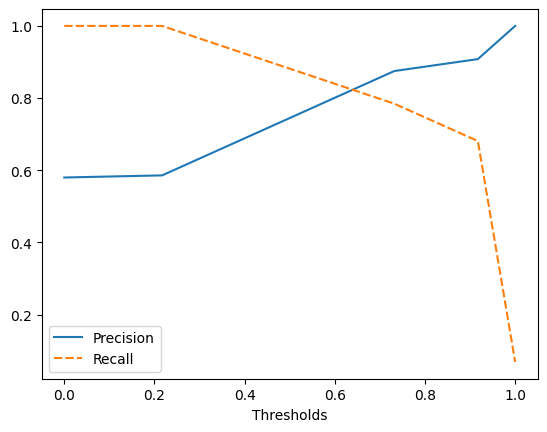

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = pd.DataFrame({
    "Precision": precisions[:-1],
    "Recall": recalls[:-1],
}, index=thresholds)

sns.lineplot(metrics)
plt.xlabel("Thresholds")

# Anmerkung

In [ ]:
df

,age,resting_BP,serum_cholestrol,max_heart_rate,old_peak,heart_disease
0,53,171,0,147,5.3,True
1,40,94,229,115,3.7,False
2,49,133,142,202,5.0,False
3,43,138,295,153,3.2,True
4,31,199,0,136,5.3,True
...,...,...,...,...,...,...
995,48,139,349,183,5.6,True
996,47,143,258,98,5.7,False
997,69,156,434,196,1.4,True
998,45,186,417,117,5.9,True


In [ ]:
df_2 = pd.read_csv("Heart_Disease_Data_Modified.csv")
df_2

,age,resting_BP,serum_cholestrol,max_heart_rate,old_peak,heart_disease
0,53,171,0,147,5.3,Present
1,40,94,229,115,3.7,Absent
2,49,133,142,202,5.0,Absent
3,43,138,295,153,3.2,Present
4,31,199,0,136,5.3,Present
...,...,...,...,...,...,...
995,48,139,349,183,5.6,Present
996,47,143,258,98,5.7,Absent
997,69,156,434,196,1.4,Present
998,45,186,417,117,5.9,Present


In [ ]:
X_2 = df_2.copy()
y_2 = X_2.pop("heart_disease") == "Present"

In [ ]:
y_2

0       True
1      False
2      False
3       True
4       True
       ...  
995     True
996    False
997     True
998     True
999    False
Name: heart_disease, Length: 1000, dtype: bool